In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import talib

In [27]:
data = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMCP_2\Ayush\round-1-island-data-bottle\prices_round_1_day_0.csv', sep = ';')

In [28]:
data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
2,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0


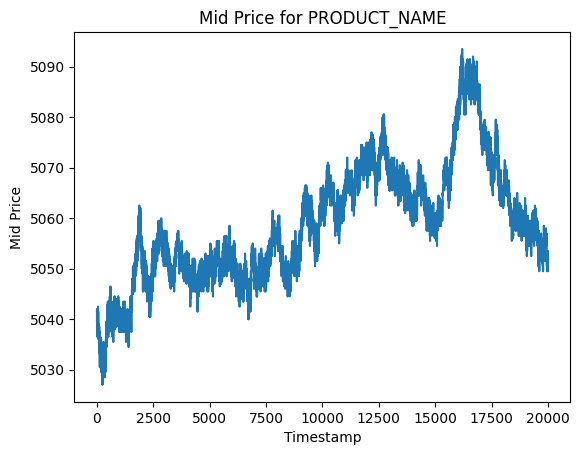

In [30]:
data[data['product'] == 'STARFRUIT']['mid_price'].plot()
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price for PRODUCT_NAME')
plt.show()


In [31]:
df_1 = data[data['product'] == 'STARFRUIT']

In [7]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add mid_price trace
# fig.add_trace(go.Scatter(x=df_1.index, y=df_1['mid_price'], name='Mid Price'))
fig.add_trace(go.Scatter(x=df_1.index, y=df_1['bid_price_1'], name='bid Price'))
fig.add_trace(go.Scatter(x=df_1.index, y=df_1['ask_price_1'], name='ask Price'))

# Add macd_hist trace
fig.add_trace(go.Scatter(x=df_1.index, y=df_1['macd_hist'], name='MACD Histogram', yaxis='y2'))

# Add macd_signal trace
# fig.add_trace(go.Scatter(x=df_1.index, y=df_1['macd_signal'], name='MACD Signal', yaxis='y3'))

# Set layout
fig.update_layout(
    title='Mid Price, MACD Histogram, and MACD Signal',
    xaxis=dict(title='Timestamp'),
    yaxis=dict(title='Mid Price'),
    yaxis2=dict(title='MACD Histogram', side='right', overlaying='y', showgrid=False),
    yaxis3=dict(title='MACD Signal', side='right', overlaying='y', showgrid=False),
    legend=dict(x=0, y=1)
)

# Show the plot
fig.show()


KeyError: 'macd_hist'

In [8]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
macd, macd_signal, macd_hist = talib.MACD(df_1['mid_price'])
df_1['macd'] = macd
df_1['macd_signal'] = macd_signal
df_1['macd_hist'] = macd_hist


C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\3075745255.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\3075745255.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\3075745255.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [32]:
def print_corrs(df, alphas, rets = ['ret_10', 'ret_30', 'ret_1', 'ret_5']):
# def print_corrs(df, alphas, rets = ['ret_10', 'ret_30', 'iv_10']):
# def print_corrs(df, alphas, rets = ['tick_10', 'tick_30', 'tick_60', 'tick_300']):
# def print_corrs(df, alphas, rets = ['ret_60', 'ret_300', 'iv_60']):
    msg = "                                      "
    for ret in rets:
        msg += f"{ret:>8s}"
    print(msg)
    for alpha in alphas:
        msg = f"{alpha:30s} corr -> "
        for ret in rets:
            msg += f"{df[alpha].corr(df[ret])*100:7.2f} "
        print(msg)
    print()

In [33]:
def print_buckets(df, alphas, rets = ['ret_10', 'ret_5', 'ret_30', 'ret_300'], aggfunc = ['mean', 'median', 'count'], buckets = 5):
# def print_buckets(df, alphas, rets = ['ret_10', 'ret_30', 'iv_10'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['tick_10', 'tick_30', 'tick_60', 'tick_300'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['ret_60', 'ret_300', 'iv_60'], aggfunc = ['mean', 'median', 'count']):
    for alpha in alphas:
        msg = df.pivot_table(index = pd.qcut(df[alpha],buckets,duplicates='drop'), values=rets, aggfunc=aggfunc)
        print(msg)

In [34]:
def add_ret(df, periods = [1, 5, 10, 30, 60, 300]):
    for period in periods:
        df[f'ret_{period}'] = df['mid_price'].pct_change(period).shift(-period) * 1e4
    return df
df = add_ret(df_1)

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\3957114906.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\3957114906.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\3957114906.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [35]:
print_corrs(df, ['macd', 'macd_signal', 'macd_hist'])

                                        ret_10  ret_30   ret_1   ret_5


KeyError: 'macd'

In [14]:
print_buckets(df, ['macd', 'macd_signal', 'macd_hist'], rets=['ret_1', 'ret_5'], aggfunc=['mean'])

                      mean          
                     ret_1     ret_5
macd                                
(-1.454, -0.376]  0.704781  0.768456
(-0.376, -0.105]  0.229394  0.203080
(-0.105, 0.142]  -0.074262 -0.158614
(0.142, 0.448]   -0.187684 -0.066831
(0.448, 1.749]   -0.623554 -0.526016


                      mean          
                     ret_1     ret_5
macd_signal                         
(-1.192, -0.336]  0.183724  0.277072
(-0.336, -0.095]  0.042852 -0.047688
(-0.095, 0.13]   -0.050219 -0.001565
(0.13, 0.421]    -0.037479 -0.025150
(0.421, 1.51]    -0.090470  0.016148
                       mean          
                      ret_1     ret_5
macd_hist                            
(-0.539, -0.139]   1.511507  1.525438
(-0.139, -0.0427]  0.437507  0.350744
(-0.0427, 0.0377] -0.016962  0.021337
(0.0377, 0.137]   -0.469938 -0.426454
(0.137, 0.653]    -1.413809 -1.252220


In [15]:
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    # Calculate the short-term exponential moving average (EMA)
    ema_fast = df['mid_price'].ewm(span=fast_period).mean()
    
    # Calculate the long-term exponential moving average (EMA)
    ema_slow = df['mid_price'].ewm(span=slow_period).mean()
    
    # Calculate the MACD line
    macd_line = ema_fast - ema_slow
    
    # Calculate the signal line
    signal_line = macd_line.ewm(span=signal_period).mean()
    
    # Calculate the MACD histogram
    macd_hist = macd_line - signal_line
    
    df['macd_line'] = macd_line
    df['signal_line'] = signal_line
    df['macd_hist'] = macd_hist

    return df

df_1 = calculate_macd(df_1)
df_1['macd'] = macd
df_1['macd_signal'] = macd_signal
df_1['macd_hist'] = macd_hist


C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\1072456942.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\1072456942.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\1072456942.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [17]:
 def calc_next_price_starfruit(self):
        coeff = [0.19847666, 0.20319141, 0.25784436, 0.34024443]
        intercept = 1.2265551526497802
        nxt_price = intercept
        for i, val in enumerate(self.starfruit_cache):
            nxt_price += val * coeff[i]
        return int(round(nxt_price))

    def compute_orders_sf(self, order_depth, acc_bid, acc_ask):
        STARFRUIT_POS_LIMIT = 20
        orders: list[Order] = []

        sell_orders = list(order_depth.sell_orders.items())
        buy_orders = list(order_depth.buy_orders.items())
        best_ask, best_ask_amount = sell_orders[0]
        best_bid, best_bid_amount = buy_orders[0]

        undercut_buy = best_bid + 1
        undercut_sell = best_ask - 1

        bid_price = min(undercut_buy, acc_bid)
        ask_price = max(undercut_sell, acc_ask)

        curr_pos = self.position["STARFRUIT"]

        for ask, vol in sell_orders:
            if ((ask <= acc_bid)) and curr_pos < STARFRUIT_POS_LIMIT: ## Try adding (self.position[product]<0) and (ask == acc_bid+1) to the condition
                order_for = min(-vol, STARFRUIT_POS_LIMIT - curr_pos)
                curr_pos += order_for
                assert(order_for >= 0)
                orders.append(Order("STARFRUIT", ask, order_for))

        if curr_pos < STARFRUIT_POS_LIMIT:
            num = STARFRUIT_POS_LIMIT - curr_pos
            orders.append(Order("STARFRUIT", bid_price, num))
            curr_pos += num


        curr_pos = self.position["STARFRUIT"]

        for bid, vol in buy_orders:
            if ((bid >= acc_ask)) and curr_pos > -STARFRUIT_POS_LIMIT: ## Try adding (self.position[product]>0) and (bid == acc_ask-1) to the condition
                order_for = max(-vol, -STARFRUIT_POS_LIMIT-curr_pos)
                curr_pos += order_for
                assert(order_for <= 0)
                orders.append(Order("STARFRUIT", bid, order_for))

        if curr_pos > -STARFRUIT_POS_LIMIT:
            num = -STARFRUIT_POS_LIMIT-curr_pos
            orders.append(Order("STARFRUIT", ask_price, num))
            curr_pos += num

        return orders

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

In [ ]:
def compute_starfruit_macd(mid_price, ema_fast, ema_slow, signal_line):

    ema_fast = 0.95 * ema_fast + 0.05 * mid_price
    # Calculate the long-term exponential moving average (EMA)
    ema_slow = 0.99 * ema_slow + 0.01 * mid_price
    # Calculate the MACD line
    macd_line = ema_fast - ema_slow
    # Calculate the signal line
    signal_line = 0.95 * signal_line + 0.05 * macd_line
    # Calculate the MACD histogram
    macd_hist = macd_line - signal_line
    return ema_fast, ema_slow, macd_line, signal_line, macd_hist

def compute_orders_sf(self, order_depth, macd_hist):
    STARFRUIT_POS_LIMIT = 20
    orders: list[Order] = []

    sell_orders = list(order_depth.sell_orders.items())
    buy_orders = list(order_depth.buy_orders.items())
    best_ask, best_ask_amount = sell_orders[0]
    best_bid, best_bid_amount = buy_orders[0]

    undercut_buy = best_bid + 1
    undercut_sell = best_ask - 1

    bid_price = undercut_buy
    ask_price = undercut_sell

    curr_pos = self.position["STARFRUIT"]

    ## if macd_hist < 0, buying
    if macd_hist < -0.2:
        if curr_pos < STARFRUIT_POS_LIMIT:
            ask, vol = sell_orders[0]
            num = STARFRUIT_POS_LIMIT - curr_pos
            order_for = min(num, vol)
            orders.append(Order("STARFRUIT", ask, num))
            curr_pos += num

    curr_pos = self.position["STARFRUIT"]

    ## if macd_hist > 0, selling
    if macd_hist > 0.2:
        if curr_pos > -STARFRUIT_POS_LIMIT:
            bid, vol = buy_orders[0]
            num = -STARFRUIT_POS_LIMIT - curr_pos
            order_for = max(num, -vol)
            orders.append(Order("STARFRUIT", bid, num))
            curr_pos += num

    return orders

In [ ]:
traderData = f"{ema_fast},{ema_slow},{macd_line}"


In [ ]:
import jsonpickle

# Serialize
data_toremember = {'ema_fast': ema_fast, 'ema_slow': ema_slow, 'macd_line': macd_line}
traderData = jsonpickle.encode(data_toremember)

# Deserialize
data_past = jsonpickle.decode(traderData)
ema_fast = data_past['ema_fast']
ema_slow = data_past['ema_slow']
macd_line = data_past['macd_line']


In [ ]:
traderData = str((best_bid + best_ask)//2)

In [ ]:
df_1.head() 

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,macd,macd_signal,macd_hist,ret_1,ret_5,ret_10,ret_30,ret_60,ret_300
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0,0.000000,0.000000,0.000000,4.000000,4.000000,-2.000000,-2.0000,4.0000,-13.000000
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0,0.044872,0.024929,0.019943,-3.998401,-4.998001,-4.998001,0.0000,0.0000,-13.994402
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0,-0.004844,0.012727,-0.017571,-1.000000,0.000000,0.000000,-1.0000,5.0000,-12.000000
7,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0,-0.045390,-0.006960,-0.038429,-2.000200,6.000600,5.000500,1.0001,4.0004,-5.000500
9,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0,-0.106258,-0.036499,-0.069759,7.002101,8.002401,0.000000,4.0012,0.0000,-9.002701


In [36]:
def calculate_max_corr(df):
    max_corr = -1
    max_period = ()
    for fast_period in range(10, 21):
        for slow_period in range(20, 31):
            for signal_period in range(5, 15):
                df_macd = calculate_macd(df, fast_period, slow_period, signal_period)
                corr = df_macd['macd_hist'].corr(df_macd['ret_5'])
                if corr > max_corr:
                    max_corr = corr
                    max_period = (fast_period, slow_period, signal_period)
    return max_corr, max_period

max_corr, max_period = calculate_max_corr(df_1)

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\3518421823.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\3518421823.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\3518421823.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [38]:
import pandas as pd

def calculate_macd(df, fast_period=3, slow_period=99, signal_period=2):
    # Calculate the short-term exponential moving average (EMA)
    ema_fast = df['mid_price'].ewm(span=fast_period).mean()
    
    # Calculate the long-term exponential moving average (EMA)
    ema_slow = df['mid_price'].ewm(span=slow_period).mean()
    
    # Calculate the MACD line
    macd_line = ema_fast - ema_slow
    
    # Calculate the signal line
    signal_line = macd_line.ewm(span=signal_period).mean()
    
    # Calculate the MACD histogram
    macd_hist = macd_line - signal_line
    
    df['macd_line'] = macd_line
    df['signal_line'] = signal_line
    df['macd_hist'] = macd_hist

    return df

def print_corrs(df, alphas, rets=['ret_10', 'ret_30', 'ret_1', 'ret_5']):
    msg = "                                      "
    for ret in rets:
        msg += f"{ret:>8s}"
    print(msg)
    for alpha in alphas:
        msg = f"{alpha:30s} corr -> "
        for ret in rets:
            msg += f"{df[alpha].corr(df[ret])*100:7.2f} "
        print(msg)
    print()

# Example DataFrame df_1
# df_1 = df[df['product'] == 'STARFRUIT']

# Function to calculate max correlation between macd_hist and rets
def calculate_max_corr(df):
    max_corr = 1
    max_period = ()
    for fast_period in range(1, 25):
        for slow_period in range(70, 120):
            for signal_period in range(1, 25):
                df_macd = calculate_macd(df, fast_period, slow_period, signal_period)
                corr = df_macd['macd_hist'].corr(df_macd['ret_5'])
                if corr < max_corr:
                    max_corr = corr
                    max_period = (fast_period, slow_period, signal_period)
    return df_macd, max_corr, max_period

# Call the function to calculate max correlation and the corresponding periods
df_macd, max_corr, max_period = calculate_max_corr(df_1)

print(f"Maximum correlation: {max_corr:.2f}")
print(f"Periods: Fast={max_period[0]}, Slow={max_period[1]}, Signal={max_period[2]}")


C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\65547916.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\65547916.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\65547916.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Maximum correlation: -0.51
Periods: Fast=1, Slow=119, Signal=6


In [21]:
def calculate_macd(df, fast_period=15, slow_period=99, signal_period=2):
    # Calculate the short-term exponential moving average (EMA)
    ema_fast = df['mid_price'].ewm(span=fast_period).mean()
    
    # Calculate the long-term exponential moving average (EMA)
    ema_slow = df['mid_price'].ewm(span=slow_period).mean()
    
    # Calculate the MACD line
    macd_line = ema_fast - ema_slow
    
    # Calculate the signal line
    signal_line = macd_line.ewm(span=signal_period).mean()
    
    # Calculate the MACD histogram
    macd_hist = macd_line - signal_line
    
    df['macd_line'] = macd_line
    df['signal_line'] = signal_line
    df['macd_hist'] = macd_hist

    return df

df = calculate_macd(df_1, fast_period=3, slow_period=99, signal_period=2)

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\4089688925.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\4089688925.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_14936\4089688925.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [22]:
print_corrs(df, ['macd_hist'], rets=['ret_10', 'ret_30', 'ret_1', 'ret_5'])
print_buckets(df, ['macd_hist'], rets=['ret_10', 'ret_30', 'ret_1', 'ret_5'], aggfunc=['mean', 'median', 'count'], buckets = 10)

                                        ret_10  ret_30   ret_1   ret_5
macd_hist                      corr ->  -46.12  -35.40  -56.98  -51.45 

                         mean                                  median                               count                    
                        ret_1    ret_10    ret_30     ret_5     ret_1    ret_10    ret_30     ret_5 ret_1 ret_10 ret_30 ret_5
macd_hist                                                                                                                    
(-0.87, -0.266]      3.967671  3.946303  4.158165  3.877160  4.013042  4.011634  4.006812  3.989030  1000   1000    999  1000
(-0.266, -0.162]     1.192676  1.364236  1.606063  1.371604  1.002908  1.007709  1.980296  1.004773  1000    998    998  1000
(-0.162, -0.0986]    0.509036  0.506577  0.664089  0.590105  0.000000  0.000000  0.000000  0.000000  1000   1000    998  1000
(-0.0986, -0.0482]   0.223817  0.285766  0.328611  0.231337  0.000000  0.000000  0.000000  0.000000 